# Make linear regression plots

Based on Michael Galarnyk's LinkedIn Learning course, "Machine Learning with Scikit Learn" and Lillian Pierson's "Python for Data Science Essential Training Part 1", using data from my own weight-loss spreadsheet.

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Read input, convert to dataframe

In [13]:
address = './Weights.xlsx'
weight_chart = pd.read_excel(address)
df_ori = DataFrame(weight_chart)
df = df_ori.iloc[:, 0:4].dropna()
#df

### Get max weight and its index

In [14]:
max_wt = df['Wt'].max() # 211.1

# df['Wt'].idxmax() is wrong, mistakes column 'Date (num)'' as index, gives 765
max_wt_index = np.argmax(df['Wt'].values) # 517, right
max_wt_index

517

### Make two DataFrame slices of df: df_upto, up to but not including row of max weight; and df_from, from row of max weight to end;

In [15]:
df_upto = df.iloc[:max_wt_index, :]
df_from = df.iloc[max_wt_index:, :]
#print(df_upto[0:5], '\n\n', df_from[-5:])#; df_from.head()

### Create a function to do the linear regression, with data frame as argument

In [91]:
def lin_regress(df, titlepart="Weight vs. Date"):
    '''
    Plot linear-regression curve for dataframe df, with trendline
    '''
    # The other part of the title is R^2.
    
    fig, ax = plt.subplots()

    # Convert x column to numpy array   This is straight from Galarnyk
    X = df.loc[:, ['Date (num)']].values # create a numpy array
    X_string = df.loc[:,['Date']].values # separate numpy array for dates as strings

    # Following was already imported earlier in the notebook so commenting out
    #from sklearn.linear_model import LinearRegression

    # Features Matrix needs to be at 2 dimensional:
    # can print(X.shape) if desired.

    # Create a numpy array of the weights
    y = df.loc[:, 'Wt'].values #; print(y.shape)

    # Linear Regression:

    # Step 1: Import the model you want to use
    # (In sklearn, all machine learning models are implemented as Python classes.)
    # This was already imported earlier in the notebook so commenting out
    #from sklearn.linear_model import LinearRegression

    # Step 2: Make an instance of the Model
    # (This is a place where you can tune the hyperparameters of a model. 
    # In the case of linear regression, you can set `fit_intercept` to 
    # True or False depending on your needs. This is an important concept as 
    # more complex models have a lot more you can tune.)

    # Make a linear regression instance
    reg = LinearRegression(fit_intercept=True)

    # Step 3: Training the model on the data, storing the information 
    # learned from the data:
    reg.fit(X,y)

    # Step 4: Predict the values of new data. Uses the information 
    # the model learned during the model training process

    # Predict for One Observation:
    # Input needs to be two dimensional (reshape makes input two dimensional.)
    reg.predict(X[0].reshape(-1,1))

    # Predict for Multiple Observations at Once
    reg.predict(X[0:10])

    # Measuring Model Performance:
    # Unlike classification models where a common metric is accuracy, 
    #regression models use other metrics like R^2, the coefficient of 
    #determination to quantify your model's performance. The best possible 
    #score is 1.0. A constant model that always predicts the expected value 
    # of y, disregarding the input features, would get a R^2 score of 0.0.
    score = reg.score(X, y)

    # What is the equation of the line for the regression?
    # After you fit an instance of a model in scikit-learn, you can use 
    # additional attributes.
    m = reg.coef_[0]
    b = reg.intercept_

    # Plotting the best-fit Linear Regression Line in red
    ax.scatter(X_string, y, color='black')
    ax.plot(X_string, reg.predict(X), color='red')
    ax.grid(True, axis = 'both', zorder = 0, linestyle = ':', color = 'k')
    plt.xticks(rotation=75)
    ax.tick_params(labelsize = 18)
    ax.set_xlabel('Year, Month', fontsize = 16)
    ax.set_ylabel('Weight (lbs)', fontsize = 16)
    ax.set_title(titlepart + 
    ", R^2 = {:.2f}".format(score), fontsize = 16 )
    fig.tight_layout()
    fig.savefig(titlepart + " with Linear Regression", dpi = 300)

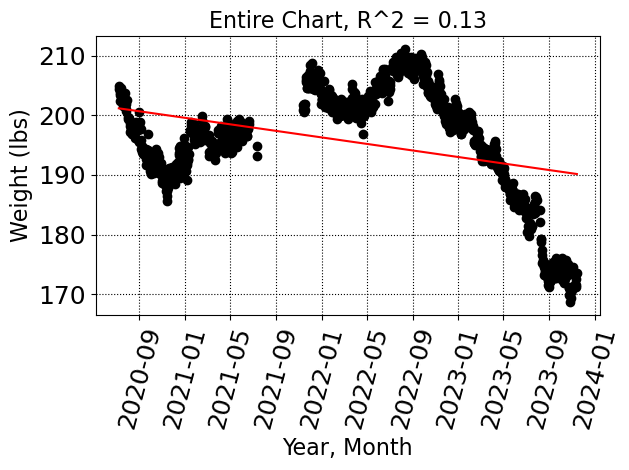

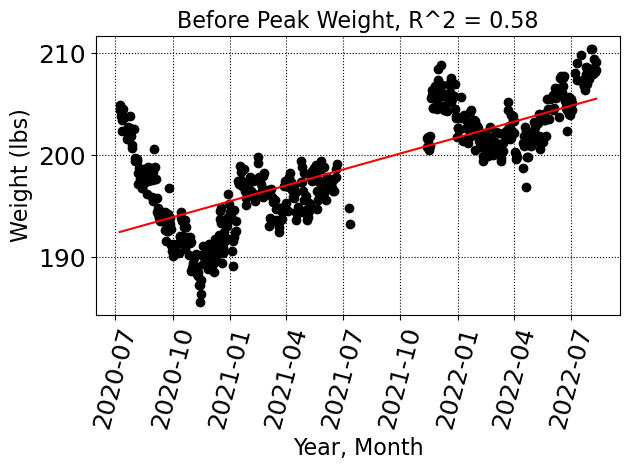

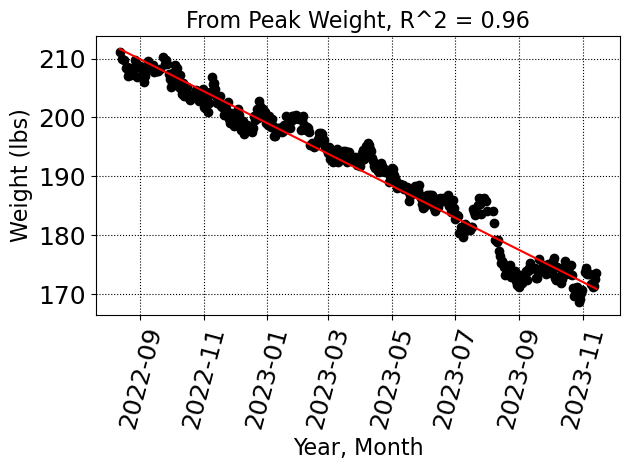

In [92]:
lin_regress(df, titlepart="Entire Chart")
lin_regress(df_upto, titlepart="Before Peak Weight")
lin_regress(df_from, titlepart="From Peak Weight")